In [1]:
from feature_writer.utils import create_dataset
from feature_writer.pump_feature_writer import REGRESSOR_OFFSETS, DECAY_OFFSETS
from core.feature_type import FeatureType

from tqdm import tqdm
from typing import *

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load data from pumps/cross_sections
df: pd.DataFrame = create_dataset()
df["is_pumped"] = df["currency_pair"] == df["pumped_currency_pair"] # create bool column is_pumped

2025-08-12 22:29:52,984 | INFO | root | No cross section found for pump AAPC-BTC-BINANCE_SPOT-2020-11-18T18-00-11
2025-08-12 22:29:53,235 | INFO | root | No cross section found for pump BRX-BTC-BINANCE_SPOT-2019-04-04T20-00-02
2025-08-12 22:29:53,275 | INFO | root | No cross section found for pump CRACK-BTC-BINANCE_SPOT-2021-08-07T12-00-24
2025-08-12 22:29:53,276 | INFO | root | No cross section found for pump CREA-BTC-BINANCE_SPOT-2021-07-28T12-00-09
2025-08-12 22:29:53,276 | INFO | root | No cross section found for pump CRUMB-BTC-BINANCE_SPOT-2021-07-26T12-00-09
2025-08-12 22:29:53,277 | INFO | root | No cross section found for pump CTCX-BTC-BINANCE_SPOT-2020-06-03T16-00-12
2025-08-12 22:29:53,295 | INFO | root | No cross section found for pump CURE-BTC-BINANCE_SPOT-2019-03-19T20-01-23
2025-08-12 22:29:53,378 | INFO | root | No cross section found for pump DTB-BTC-BINANCE_SPOT-2019-03-28T20-00-55
2025-08-12 22:29:53,422 | INFO | root | No cross section found for pump ETHOS-BTC-BINANC

In [2]:
# Overall we have data for 465 pumps
df["pump_hash"].nunique()

465

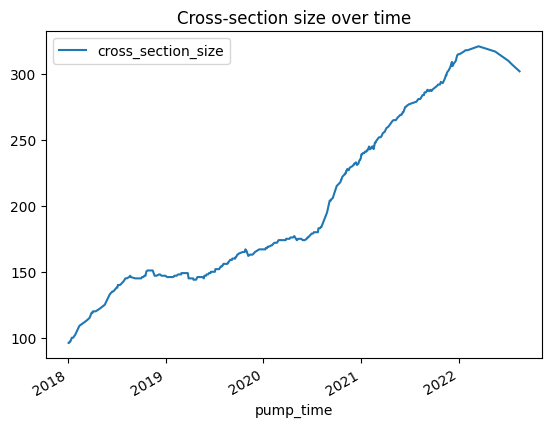

In [3]:
# cross-section statistics
(
    df.groupby("pump_hash")
    .agg(
        pump_time=("pump_time", "first"),
        cross_section_size=("pump_time", "count")
    )
    .sort_values(by="pump_time", ascending=True)
    .plot(x="pump_time", y="cross_section_size", title="Cross-section size over time")
)
plt.show()

<h4>Feature distributions and cross-sectional standardisation</h4>

In [4]:
import warnings 

warnings.filterwarnings("ignore", category=RuntimeWarning)

<p>Now we will go through each FeatureType and display distribution stats and fix gaps in data</p>

<h4>Powerlaw features</h4>

In [5]:
powerlaw_cols: List[str] = FeatureType.POWERLAW_ALPHA.col_names(offsets=REGRESSOR_OFFSETS)
df[powerlaw_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
powerlaw_alpha@5MIN,80705.0,inf,NaN,-9.007199e+15,1.287623,1.424880,1.817273,inf
powerlaw_alpha@15MIN,87792.0,inf,NaN,-9.007199e+15,1.239690,1.324334,1.465167,inf
powerlaw_alpha@1H,89564.0,inf,NaN,1.087056e+00,1.198936,1.255379,1.331836,inf
powerlaw_alpha@2H,89609.0,inf,NaN,1.083316e+00,1.182755,1.231658,1.296088,inf
powerlaw_alpha@4H,89623.0,inf,NaN,1.087441e+00,1.168423,1.212604,1.266654,inf
powerlaw_alpha@12H,89643.0,1.203846,0.079914,1.085992e+00,1.153432,1.191061,1.234608,4.958618
powerlaw_alpha@1D,89646.0,1.191712,0.069028,1.084541e+00,1.146997,1.179846,1.220118,4.713602
powerlaw_alpha@2D,89695.0,1.181402,0.061276,1.042519e+00,1.141515,1.170744,1.208071,4.552822
powerlaw_alpha@7D,89863.0,1.168056,0.048476,1.041700e+00,1.134057,1.158819,1.192631,2.326308
powerlaw_alpha@14D,90034.0,1.162512,0.044270,1.041700e+00,1.130583,1.154018,1.186157,2.035152


In [6]:
# clip pawerlaw features to range [1, 2]
df[powerlaw_cols] = df[powerlaw_cols].clip(1, 2)
df[powerlaw_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
powerlaw_alpha@5MIN,80705.0,1.531988,0.296224,1.000000,1.287623,1.424880,1.817273,2.0
powerlaw_alpha@15MIN,87792.0,1.398882,0.233979,1.000000,1.239690,1.324334,1.465167,2.0
powerlaw_alpha@1H,89564.0,1.282979,0.132462,1.087056,1.198936,1.255379,1.331836,2.0
powerlaw_alpha@2H,89609.0,1.251003,0.103821,1.083316,1.182755,1.231658,1.296088,2.0
powerlaw_alpha@4H,89623.0,1.228017,0.088925,1.087441,1.168423,1.212604,1.266654,2.0
powerlaw_alpha@12H,89643.0,1.203576,0.074630,1.085992,1.153432,1.191061,1.234608,2.0
powerlaw_alpha@1D,89646.0,1.191592,0.066371,1.084541,1.146997,1.179846,1.220118,2.0
powerlaw_alpha@2D,89695.0,1.181297,0.058600,1.042519,1.141515,1.170744,1.208071,2.0
powerlaw_alpha@7D,89863.0,1.168047,0.048311,1.041700,1.134057,1.158819,1.192631,2.0
powerlaw_alpha@14D,90034.0,1.162511,0.044256,1.041700,1.130583,1.154018,1.186157,2.0


In [26]:
df[powerlaw_cols].isna().sum()

powerlaw_alpha@5MIN     9711
powerlaw_alpha@15MIN    2624
powerlaw_alpha@1H        852
powerlaw_alpha@2H        807
powerlaw_alpha@4H        793
powerlaw_alpha@12H       773
powerlaw_alpha@1D        770
powerlaw_alpha@2D        721
powerlaw_alpha@7D        553
powerlaw_alpha@14D       382
dtype: int64

In [ ]:
df[powerlaw_cols].isna()

<h4>Asset return features</h4>

<p><b>Note: returns are measured in pips</b></p>
<p>Here we observe that anticipated behaviour as time window grows the min/max and std become higher in absolute terms</p>

In [7]:
asset_return_cols: List[str] = FeatureType.ASSET_RETURN.col_names(offsets=REGRESSOR_OFFSETS)
df[asset_return_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
asset_return@5MIN,80704.0,3.562630,143.246066,-3333.333333,-18.998239,0.000000,20.733446,7000.000000
asset_return@15MIN,87791.0,4.860312,168.379818,-3333.333333,-31.347962,0.000000,34.246575,7000.000000
asset_return@1H,89562.0,7.706773,232.538110,-3528.125000,-65.415976,0.000000,64.330050,7288.135593
asset_return@2H,89602.0,8.407601,289.684426,-5000.000000,-95.465394,0.000000,83.391246,12371.541502
asset_return@4H,89608.0,20.408480,364.543240,-3875.968992,-126.582278,0.000000,122.950820,12549.800797
asset_return@12H,89587.0,35.501354,677.446528,-6392.125806,-210.154787,0.000000,203.566885,119032.258065
asset_return@1D,89572.0,31.638100,874.306792,-4814.814815,-331.963984,-25.169194,270.270270,119032.258065
asset_return@2D,89540.0,0.177779,1217.933973,-6050.000000,-506.351686,-79.146182,324.324324,119032.258065
asset_return@7D,88949.0,18.465014,4350.201277,-9999.946672,-1066.176471,-222.954142,614.035088,979361.702128
asset_return@14D,88302.0,66.269875,6591.389597,-9999.952116,-1600.000000,-399.725702,872.498615,979361.702128


<h4>Asset return zscores</h4>

In [8]:
asset_return_zscore_cols: List[str] = FeatureType.ASSET_RETURN_ZSCORE.col_names(offsets=REGRESSOR_OFFSETS)
df[asset_return_zscore_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
asset_return_zscore@5MIN,78649.0,0.067801,1.247712,-14.091035,-0.454085,0.000000,0.458000,25.383653
asset_return_zscore@15MIN,78649.0,0.067801,1.247712,-14.091035,-0.454085,0.000000,0.458000,25.383653
asset_return_zscore@1H,89594.0,0.067359,1.009423,-14.091035,-0.374021,0.000000,0.401836,20.413539
asset_return_zscore@2H,89618.0,0.046996,0.733962,-7.602639,-0.295598,0.000000,0.305310,13.955420
asset_return_zscore@4H,89623.0,0.040440,0.542246,-6.030088,-0.218957,0.000938,0.229989,13.955420
asset_return_zscore@12H,89643.0,0.024264,0.301750,-2.251391,-0.123331,0.001593,0.138295,6.795124
asset_return_zscore@1D,89645.0,0.008504,0.194549,-1.767127,-0.096689,-0.004795,0.096121,1.892111
asset_return_zscore@2D,89692.0,-0.001418,0.136163,-2.123060,-0.074910,-0.007487,0.063404,4.823023
asset_return_zscore@7D,89857.0,-0.002789,0.081504,-2.123060,-0.045941,-0.003736,0.039177,4.974488
asset_return_zscore@14D,90025.0,-0.002527,0.061846,-2.308614,-0.035172,-0.002233,0.030220,4.972071


<h4>Quote abs zscore</h4>

In [9]:
quote_abs_zscore_cols: List[str] = FeatureType.QUOTE_ABS_ZSCORE.col_names(offsets=REGRESSOR_OFFSETS)
df[quote_abs_zscore_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
quote_abs_zscore@5MIN,78649.0,0.715567,1.346148,0.000032,0.125396,0.324906,0.777614,26.408984
quote_abs_zscore@15MIN,78649.0,0.715567,1.346148,0.000032,0.125396,0.324906,0.777614,26.408984
quote_abs_zscore@1H,89594.0,0.709222,1.222409,0.000011,0.139086,0.341927,0.796574,26.408984
quote_abs_zscore@2H,89618.0,0.692697,1.046213,0.000035,0.153336,0.359790,0.805967,17.311744
quote_abs_zscore@4H,89623.0,0.677129,0.905250,0.000124,0.167933,0.378594,0.815733,10.788326
quote_abs_zscore@12H,89643.0,0.607964,0.680705,0.000598,0.177076,0.381328,0.773965,7.441625
quote_abs_zscore@1D,89645.0,0.575595,0.582985,0.000713,0.183730,0.384323,0.754373,5.185480
quote_abs_zscore@2D,89692.0,0.572727,0.510931,0.000392,0.206930,0.414282,0.776796,5.133345
quote_abs_zscore@7D,89857.0,0.572334,0.399157,0.000392,0.273018,0.486393,0.782961,4.978211
quote_abs_zscore@14D,90025.0,0.574570,0.351313,0.000481,0.322155,0.512351,0.765111,4.978211


<h4>Share of long trades</h4>

In [10]:
share_of_long_trades_cols: List[str] = FeatureType.SHARE_OF_LONG_TRADES.col_names(offsets=REGRESSOR_OFFSETS)
df[share_of_long_trades_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
share_of_long_trades@5MIN,80705.0,0.517619,0.292971,0.000000,0.333333,0.500000,0.714286,1.000000
share_of_long_trades@15MIN,87792.0,0.518497,0.225381,0.000000,0.388337,0.517241,0.666667,1.000000
share_of_long_trades@1H,89564.0,0.517405,0.150723,0.000000,0.433333,0.517570,0.604371,1.000000
share_of_long_trades@2H,89609.0,0.516353,0.124644,0.000000,0.447535,0.516129,0.586592,1.000000
share_of_long_trades@4H,89623.0,0.517723,0.106441,0.000000,0.460674,0.516129,0.574679,1.000000
share_of_long_trades@12H,89643.0,0.518580,0.090451,0.000000,0.473177,0.516221,0.562500,0.995282
share_of_long_trades@1D,89646.0,0.520155,0.080576,0.028927,0.481653,0.516692,0.555605,0.993056
share_of_long_trades@2D,89695.0,0.521237,0.072690,0.047204,0.487069,0.516340,0.550570,0.989017
share_of_long_trades@7D,89863.0,0.523347,0.064164,0.083655,0.494366,0.517148,0.545904,0.976714
share_of_long_trades@14D,90034.0,0.525248,0.060264,0.093449,0.497502,0.517926,0.545271,0.962848


<h4>Slippage imbalance</h4>

In [11]:
slippage_imbalance_cols: List[str] = FeatureType.SLIPPAGE_IMBALANCE.col_names(offsets=REGRESSOR_OFFSETS)
df[slippage_imbalance_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
slippage_imbalance@5MIN,50409.0,-0.045834,0.894207,-1.0,-1.000000,-0.203425,1.000000,1.0
slippage_imbalance@15MIN,69481.0,-0.063537,0.839779,-1.0,-0.992719,-0.187897,0.937962,1.0
slippage_imbalance@1H,84123.0,-0.104279,0.736791,-1.0,-0.853151,-0.201891,0.621789,1.0
slippage_imbalance@2H,87040.0,-0.119988,0.673762,-1.0,-0.757053,-0.191442,0.467025,1.0
slippage_imbalance@4H,88434.0,-0.123809,0.612520,-1.0,-0.660541,-0.176005,0.359398,1.0
slippage_imbalance@12H,89286.0,-0.127556,0.529450,-1.0,-0.533102,-0.156591,0.237030,1.0
slippage_imbalance@1D,89521.0,-0.130812,0.478961,-1.0,-0.468692,-0.153996,0.175327,1.0
slippage_imbalance@2D,89659.0,-0.130712,0.425145,-1.0,-0.403770,-0.145159,0.118542,1.0
slippage_imbalance@7D,89861.0,-0.110451,0.341566,-1.0,-0.300855,-0.122072,0.068231,1.0
slippage_imbalance@14D,90034.0,-0.100966,0.303535,-1.0,-0.260712,-0.112764,0.051144,1.0


<h4>Flow imbalance</h4>

In [12]:
flow_imbalance_cols: List[str] = FeatureType.FLOW_IMBALANCE.col_names(offsets=REGRESSOR_OFFSETS)
df[flow_imbalance_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
flow_imbalance@5MIN,80705.0,-0.012708,0.704696,-1.000000,-0.680934,-0.019155,0.647017,1.000000
flow_imbalance@15MIN,87792.0,-0.030108,0.582553,-1.000000,-0.483380,-0.031868,0.405768,1.000000
flow_imbalance@1H,89564.0,-0.046073,0.413153,-1.000000,-0.309494,-0.042841,0.207991,1.000000
flow_imbalance@2H,89609.0,-0.051471,0.335196,-1.000000,-0.248120,-0.045049,0.140907,1.000000
flow_imbalance@4H,89623.0,-0.046241,0.271423,-1.000000,-0.194992,-0.040175,0.100258,1.000000
flow_imbalance@12H,89643.0,-0.040030,0.202374,-1.000000,-0.144052,-0.038139,0.058774,0.993480
flow_imbalance@1D,89646.0,-0.034793,0.166562,-0.976580,-0.118040,-0.035743,0.039121,0.984582
flow_imbalance@2D,89695.0,-0.032346,0.139147,-0.976174,-0.100974,-0.036182,0.024146,0.937937
flow_imbalance@7D,89863.0,-0.023811,0.107720,-0.958871,-0.077522,-0.031839,0.012263,0.932742
flow_imbalance@14D,90034.0,-0.018970,0.097154,-0.895483,-0.068613,-0.028837,0.010617,0.907893


<h4>Num trades</h4>

In [13]:
num_trades_cols: List[str] = FeatureType.NUM_TRADES.col_names(offsets=REGRESSOR_OFFSETS)
df[num_trades_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
num_trades@5MIN,90416.0,32.018326,100.728106,0.0,2.00,8.0,25.00,4987.0
num_trades@15MIN,90416.0,95.473202,276.831868,0.0,9.00,27.0,76.00,12184.0
num_trades@1H,90416.0,393.821038,1062.882120,0.0,47.00,122.0,328.00,33566.0
num_trades@2H,90416.0,782.770129,2103.491091,0.0,100.00,251.0,664.00,88326.0
num_trades@4H,90416.0,1541.531388,4015.731292,0.0,212.00,514.0,1340.00,137259.0
num_trades@12H,90416.0,4292.818694,10908.012936,0.0,632.00,1511.0,3806.00,437471.0
num_trades@1D,90416.0,8419.411598,21190.956448,0.0,1300.00,3034.0,7509.00,855882.0
num_trades@2D,90416.0,16885.535890,41164.265945,0.0,2780.00,6341.5,15261.25,1302688.0
num_trades@7D,90416.0,59114.674626,134037.917566,0.0,11218.75,24127.5,55041.00,3823480.0
num_trades@14D,90416.0,116970.109317,254636.840587,0.0,24022.75,49745.5,111418.25,6704862.0


<h4>Plot feature distributions before and after cross-sectional standardisation</h4>

$$X_{\text{std}} = \frac{X - \bar{X}}{\sigma_{X}}$$

In [21]:
# plot feature distributions before cross-sectional standardisation
cols_to_scale: List[str] = (
    asset_return_cols + asset_return_zscore_cols + quote_abs_zscore_cols + share_of_long_trades_cols +
    powerlaw_cols + slippage_imbalance_cols + flow_imbalance_cols + num_trades_cols
)

dfs: List[pd.DataFrame] = []

for pump_hash, df_cross_section in tqdm(df.groupby("pump_hash")):
    df_cross_section = df_cross_section.reset_index(drop=True)
    for col in cols_to_scale:
        df_cross_section[col] = (df_cross_section[col] - df_cross_section[col].mean()) / df_cross_section[col].std()
    dfs.append(df_cross_section)

df_scaled: pd.DataFrame = pd.concat(dfs)
df_scaled.head(5)

100%|██████████| 465/465 [00:16<00:00, 29.03it/s]


,asset_return@5MIN,asset_return_zscore@5MIN,quote_abs_zscore@5MIN,share_of_long_trades@5MIN,powerlaw_alpha@5MIN,slippage_imbalance@5MIN,flow_imbalance@5MIN,num_trades@5MIN,asset_return@15MIN,asset_return_zscore@15MIN,...,target_return@1MIN,target_return@2MIN,target_return@3MIN,target_return@4MIN,target_return@5MIN,currency_pair,pump_hash,pump_time,pumped_currency_pair,is_pumped
0,NaN,0.267718,-0.386546,NaN,NaN,NaN,NaN,-0.426170,NaN,0.267718,...,NaN,NaN,NaN,18.832392,18.832392,RIF-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
1,0.013268,-0.161656,-0.144107,-0.629912,-1.098349,1.019464,-0.873709,2.421331,-0.114814,-0.161656,...,8.613264,10.766581,15.073213,23.686477,17.226529,ADA-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
2,0.006238,-0.743090,0.014124,-0.457766,1.218553,NaN,-1.043446,-0.242461,0.286118,-0.743090,...,NaN,32.779209,11.706860,-18.730976,-18.730976,DODO-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
3,-0.027787,-0.002437,-0.358707,-1.355500,-0.400391,1.045342,-0.032797,9.402301,0.007467,-0.002437,...,12.406948,12.406948,18.610422,18.610422,18.610422,EOS-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
4,-0.655363,0.429489,-0.055362,0.075888,-0.459940,NaN,-1.175938,-0.364934,0.163749,0.429489,...,0.000000,0.000000,0.000000,-10.090817,-10.090817,BEAM-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False


8it [00:03,  2.40it/s]


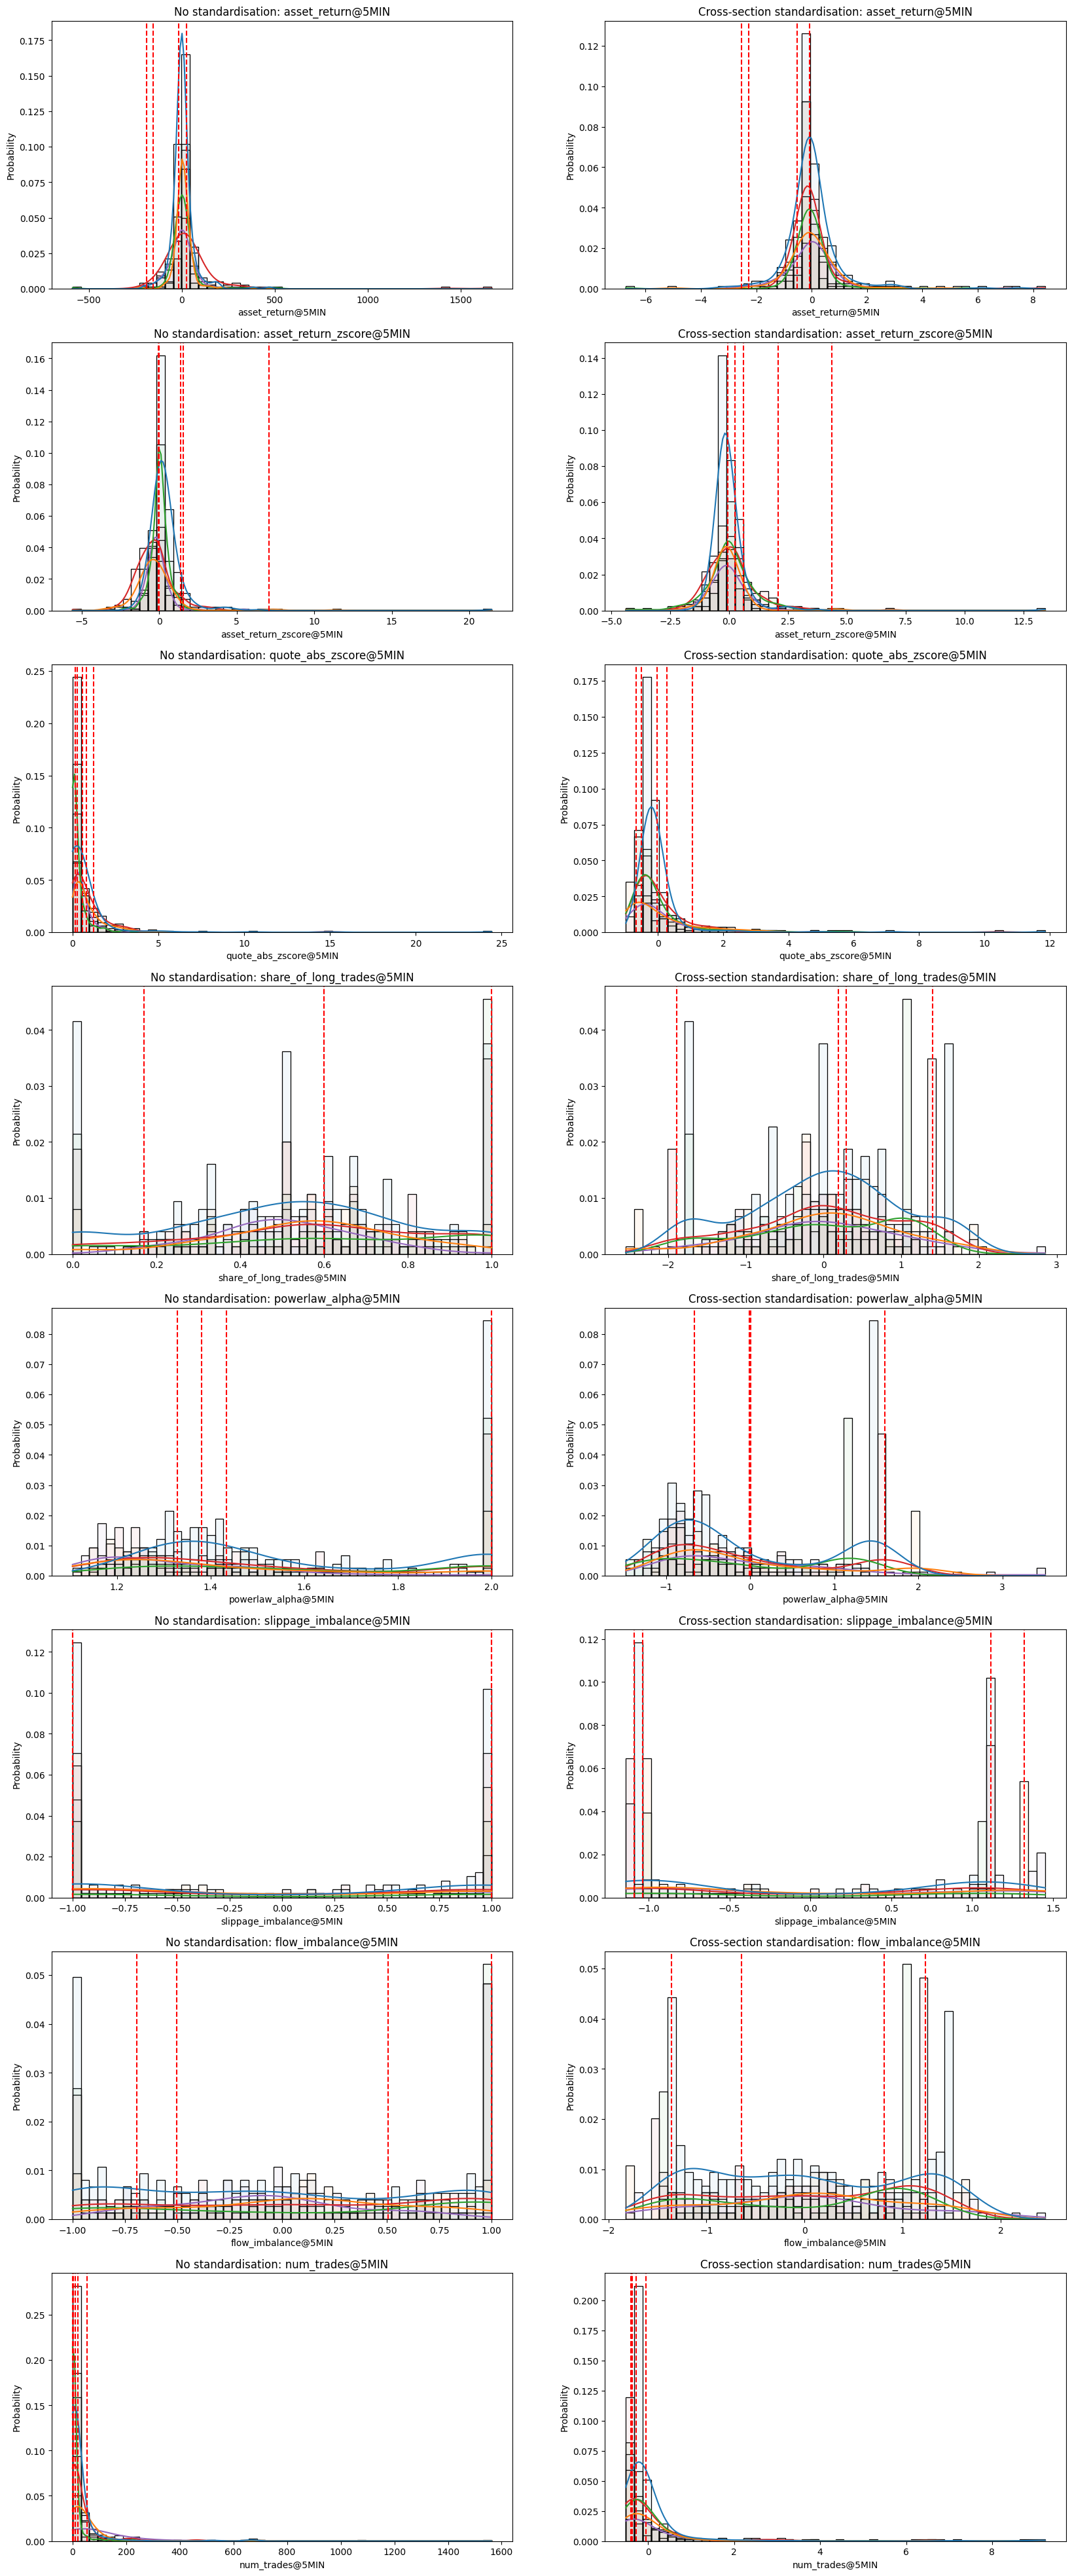

In [15]:
from core.time_utils import NamedTimeDelta
import seaborn as sns

fig, axs = plt.subplots(len(FeatureType), 2, figsize=(20, 50))
use_offset: NamedTimeDelta = NamedTimeDelta.FIVE_MINUTES

# create two smaller dataframes with less cross-sections to plot
selected_pump_hashes: np.array = np.random.choice(df["pump_hash"].unique(), 5, replace=False) # use 5 pumps for plotting
df_small: pd.DataFrame = df[df["pump_hash"].isin(selected_pump_hashes)]
df_scaled_small: pd.DataFrame = df_scaled[df_scaled["pump_hash"].isin(selected_pump_hashes)]

feature: FeatureType

for (ax1, ax2), feature in tqdm(zip(axs, list(FeatureType))):
    col_name: str = feature.col_name(offset=use_offset)
    # Plot pumps without standardisation
    sns.histplot(
        data=df_small,
        x=col_name,
        hue="pump_hash", 
        ax=ax1, legend=False, alpha=0.05, bins=50, kde=True, stat="probability"
    )
    ax1.set_title(f"No standardisation: {col_name}")
    for pump_hash in selected_pump_hashes:
        ax1.axvline(
            x=df_small.loc[df_small["is_pumped"] & (df_small["pump_hash"] == pump_hash), col_name].iloc[0], 
            color="red", linestyle="--"
        )
    
    sns.histplot(
        data=df_scaled_small,
        x=col_name,
        hue="pump_hash", 
        ax=ax2, legend=False, alpha=0.05, bins=50, kde=True, stat="probability"
    )
    ax2.set_title(f"Cross-section standardisation: {col_name}")
    for pump_hash in selected_pump_hashes:
        ax2.axvline(
            x=df_scaled_small.loc[df_scaled_small["is_pumped"] & (df_scaled_small["pump_hash"] == pump_hash), col_name].iloc[0], 
            color="red", linestyle="--"
        )

<h4>Split data and train the first model</h4>

In [16]:
from sklearn.model_selection import train_test_split

# Train/val/test split
df_train, df_val, df_test = (
    df_scaled[df_scaled["pump_time"] <= "2020-09-01"].copy(),  # train sample
    df_scaled[(df_scaled["pump_time"] > "2020-09-01") & (df_scaled["pump_time"] <= "2021-05-01")].copy(), # val sample
    df_scaled[df_scaled["pump_time"] > "2021-05-01"].copy(),  # test sample
)

# Sample statistics
pumps = np.array([df_train["is_pumped"].sum(), df_val["is_pumped"].sum(), df_test["is_pumped"].sum()])
overall_observations = np.array([df_train.shape[0], df_val.shape[0], df_test.shape[0]])
avg_cross = np.array([
    df_train.groupby("pump_hash")["currency_pair"].count().mean(), 
    df_val.groupby("pump_hash")["currency_pair"].count().mean(),
    df_test.groupby("pump_hash")["currency_pair"].count().mean()
])

df_cross_stats = pd.DataFrame({ 
    "Positive": pumps,
    "Negative": overall_observations - pumps,
    "Total": overall_observations,
    "Average Crosssection Size": avg_cross
}).T.round(1)

df_cross_stats.columns = ["Train", "Validation", "Test"]
df_cross_stats

,Train,Validation,Test
Positive,290.0,101.0,74.0
Negative,44621.0,23952.0,21378.0
Total,44911.0,24053.0,21452.0
Average Crosssection Size,154.9,238.1,289.9


<h4>Baseline Logistic Regression</h4>

In [17]:
mean_crosssection_size: int = df.groupby("pump_hash")["currency_pair"].count().mean()
print(f"Mean crosssection size across the whole dataset is {mean_crosssection_size:.3f}")

Mean crosssection size across the whole dataset is 194.443


In [18]:
# define regression columns and target
target: str = "is_pumped"
reg_cols: List[str] = (
    asset_return_cols + asset_return_zscore_cols + 
    quote_abs_zscore_cols + share_of_long_trades_cols +
    powerlaw_cols + slippage_imbalance_cols +
    flow_imbalance_cols + num_trades_cols
)

In [20]:
from sklearn.linear_model import LogisticRegression

# Train baseline Logistic Regression
model_lr = LogisticRegression(
    max_iter=int(1e10),
    class_weight={0: 1, 1: mean_crosssection_size},
)

model_lr.fit(df_train[reg_cols], df_train[target])

probas_pred_lr_val = model_lr.predict_proba(df_val[reg_cols])[:, 1]

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values